In [ ]:
#imports
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split


raw_data = load_files(os.getcwd() + r'/Data', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']

train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=1/3, random_state=0)

valid_files = train_files[90:]
valid_targets = train_targets[90:]

train_files = train_files[:90]
train_targets = train_targets[:90]

print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

Total number of videos: 180

Number of videos in training data: 90
Number of videos in validation data: 30
Number of videos in test data: 60


In [ ]:
('The categorical labels are converted into integers.\nFollowing is the mapping - \n')
for label in zip(range(6), raw_data['target_names']):
    print(label)
    
    

(0, 'boxing')
(1, 'handclapping')
(2, 'handwaving')
(3, 'jogging')
(4, 'running')
(5, 'walking')


In [ ]:
for pair in zip(train_files[:10], train_targets[:10]):
    print(pair)

('C:\\Users\\Dell\\Desktop\\Action recognization\\Action recognition/Data\\jogging\\person02_jogging_d3_uncomp.avi', 3)
('C:\\Users\\Dell\\Desktop\\Action recognization\\Action recognition/Data\\jogging\\person01_jogging_d1_uncomp.avi', 3)
('C:\\Users\\Dell\\Desktop\\Action recognization\\Action recognition/Data\\jogging\\person07_jogging_d3_uncomp.avi', 3)
('C:\\Users\\Dell\\Desktop\\Action recognization\\Action recognition/Data\\boxing\\person08_boxing_d1_uncomp.avi', 0)
('C:\\Users\\Dell\\Desktop\\Action recognization\\Action recognition/Data\\jogging\\person02_jogging_d1_uncomp.avi', 3)
('C:\\Users\\Dell\\Desktop\\Action recognization\\Action recognition/Data\\walking\\person02_walking_d4_uncomp.avi', 5)
('C:\\Users\\Dell\\Desktop\\Action recognization\\Action recognition/Data\\running\\person03_running_d3_uncomp.avi', 4)
('C:\\Users\\Dell\\Desktop\\Action recognization\\Action recognition/Data\\walking\\person07_walking_d3_uncomp.avi', 5)
('C:\\Users\\Dell\\Desktop\\Action recogni

Using TensorFlow backend.
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.50s/it]



Shape of the sample data: (1, 350, 120, 160, 3)


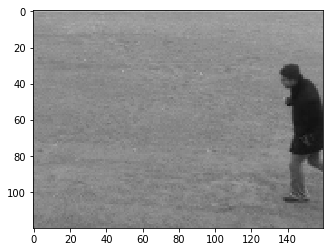

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import Videos
%matplotlib inline


sample_files = train_files[:1]


reader = Videos(target_size=None, 
                to_gray=False)


sample = reader.read_videos(sample_files)
print('\nShape of the sample data:', sample.shape)


plt.imshow(sample[0][90])

In [ ]:
#Data Preprocessing

In [ ]:
import numpy as np
from keras.utils import to_categorical
from utils import Videos


reader = Videos(target_size=(128, 128), 
                to_gray=True, 
                max_frames=200, 
                extract_frames='middle', 
                normalize_pixels=(0, 1))




In [ ]:
# Reading training videos
X_train = reader.read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [01:33<00:00,  1.07s/it]


Shape of training data: (90, 200, 128, 128, 1)
Shape of training labels: (90, 6)


In [ ]:
# Reading validation videos 
X_valid = reader.read_videos(valid_files)
y_valid = to_categorical(valid_targets, num_classes=6)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:50<00:00,  1.17s/it]


Shape of validation data: (30, 200, 128, 128, 1)
Shape of validation labels: (30, 6)


In [ ]:
X_test = reader.read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=6)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [01:05<00:00,  1.22s/it]


Shape of testing data: (60, 200, 128, 128, 1)
Shape of testing labels: (60, 6)


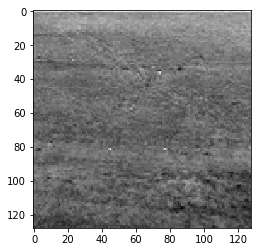

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.imshow(np.squeeze(X_train[0][0], axis=2), cmap='gray')

In [ ]:
#Model 1

In [ ]:
from keras import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense


model = Sequential()


model.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='valid', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=256, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='valid', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model.add(GlobalAveragePooling3D())


model.add(Dense(32, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 40, 128, 128, 16)  1456      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 40, 64, 64, 16)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 12, 62, 62, 64)    46144     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 12, 31, 31, 64)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 3, 29, 29, 256)    737536    
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 3, 15, 15, 256)    0         
_________________________________________________________________
glob

In [ ]:
from keras.callbacks import ModelCheckpoint

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath='Model_1.weights.best.hdf5', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train, batch_size=16, epochs=30, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 90 samples, validate on 30 samples
Epoch 1/30
 - 622s - loss: 1.4914 - acc: 0.3111 - val_loss: 1.6137 - val_acc: 0.3667

Epoch 00001: val_loss improved from inf to 1.61372, saving model to Model_1.weights.best.hdf5
Epoch 2/30
 - 614s - loss: 1.4401 - acc: 0.4000 - val_loss: 1.4947 - val_acc: 0.4000

Epoch 00002: val_loss improved from 1.61372 to 1.49468, saving model to Model_1.weights.best.hdf5
Epoch 3/30
 - 650s - loss: 1.4212 - acc: 0.4556 - val_loss: 1.4264 - val_acc: 0.5333

Epoch 00003: val_loss improved from 1.49468 to 1.42636, saving model to Model_1.weights.best.hdf5
Epoch 4/30
 - 639s - loss: 1.3330 - acc: 0.4000 - val_loss: 1.4316 - val_acc: 0.4333

Epoch 00004: val_loss did not improve from 1.42636
Epoch 5/30
 - 623s - loss: 1.2999 - acc: 0.4222 - val_loss: 1.3975 - val_acc: 0.3333

Epoch 00005: val_loss improved from 1.42636 to 1.39753, saving model to Model_1.weights.best.hdf5
Epoch 6/30
 - 623s - loss: 1.2989 - acc

In [ ]:
model.load_weights('Model_1.weights.best.hdf5')

(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=16, verbose=0)
print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

Accuracy on test data: 53.33%


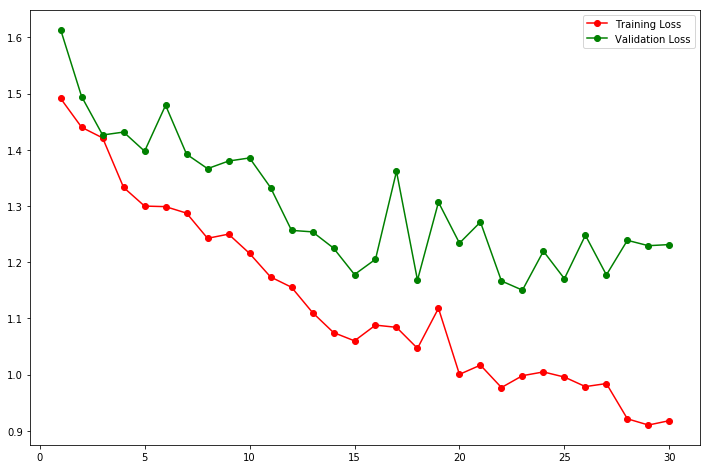

In [ ]:
plt.figure(figsize=(12, 8))

loss = history.history['loss']                          
val_loss = history.history['val_loss']                  
epochs = range(1, 31)

plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()

In [ ]:
#Model 2

In [ ]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout

model = Sequential()

model.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='valid', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=256, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='valid', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(GlobalAveragePooling3D())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 40, 128, 128, 16)  1456      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 40, 64, 64, 16)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 12, 62, 62, 64)    46144     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 12, 31, 31, 64)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 3, 29, 29, 256)    737536    
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 3, 15, 15, 256)    0         
_________________________________________________________________
glob

In [ ]:
from keras.callbacks import ModelCheckpoint

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath='Model_2.weights.best.hdf5', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train, batch_size=128, epochs=30, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 90 samples, validate on 30 samples
Epoch 1/30


In [ ]:
model.load_weights('Model_2.weights.best.hdf5')

(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=16, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

Accuracy on test data: 16.67%


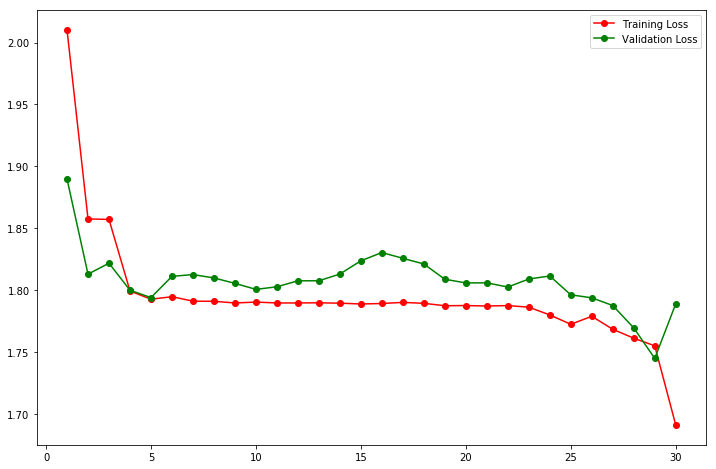

In [ ]:
plt.figure(figsize=(12, 8))

loss = history.history['loss']                          # Loss on the training data
val_loss = history.history['val_loss']                  # Loss on the validation data
epochs = range(1, 31)

plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()

In [ ]:
import numpy as np
from keras.utils import to_categorical
from utils import Videos
reader = Videos(target_size=(128, 128), 
                to_gray=True, 
                max_frames=200, 
                #extract_frames='first', 
                #required_fps=5, 
                normalize_pixels=(-1, 1))

In [ ]:
X_train = reader.read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [01:20<00:00,  1.00s/it]


Shape of training data: (90, 200, 128, 128, 1)
Shape of training labels: (90, 6)


In [ ]:
X_valid = reader.read_videos(valid_files)
y_valid = to_categorical(valid_targets, num_classes=6)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:52<00:00,  1.05s/it]


Shape of validation data: (30, 200, 128, 128, 1)
Shape of validation labels: (30, 6)


In [ ]:
X_test = reader.read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=6)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

 77%|██████████████████████████████████████████████████████████████▊                   | 46/60 [00:48<00:14,  1.03s/it]

In [ ]:
#Model 3

In [ ]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

model = Sequential()
model.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))
model.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))
model.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))
model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))
model.add(GlobalAveragePooling3D())

model.add(Dense(32, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 40, 128, 128, 16)  736       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 20, 64, 64, 16)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 19, 62, 62, 64)    18496     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 10, 31, 31, 64)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 9, 29, 29, 256)    295168    
_________________________________________________________________
max_pooling3d_3 (MaxP

In [ ]:
from keras.callbacks import ModelCheckpoint

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath='Model_3.weights.best.hdf5', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train, batch_size=16, epochs=30, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 90 samples, validate on 30 samples
Epoch 1/30
 - 434s - loss: 9.2560 - acc: 0.1889 - val_loss: 11.4859 - val_acc: 0.2000

Epoch 00001: val_loss improved from inf to 11.48586, saving model to Model_3.weights.best.hdf5
Epoch 2/30
 - 432s - loss: 13.7305 - acc: 0.1333 - val_loss: 13.4317 - val_acc: 0.1667

Epoch 00002: val_loss did not improve from 11.48586
Epoch 3/30
 - 450s - loss: 14.3272 - acc: 0.1111 - val_loss: 13.4317 - val_acc: 0.1667

Epoch 00003: val_loss did not improve from 11.48586
Epoch 4/30
 - 450s - loss: 13.6354 - acc: 0.1444 - val_loss: 13.9690 - val_acc: 0.1333

Epoch 00004: val_loss did not improve from 11.48586
Epoch 5/30
 - 440s - loss: 12.1906 - acc: 0.2333 - val_loss: 13.9690 - val_acc: 0.1333

Epoch 00005: val_loss did not improve from 11.48586
Epoch 6/30
 - 456s - loss: 12.7353 - acc: 0.2000 - val_loss: 13.9690 - val_acc: 0.1333

Epoch 00006: val_loss did not improve from 11.48586
Epoch 7/30
 - 448s - loss:

In [ ]:
model.load_weights('Model_3.weights.best.hdf5')

(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=16, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

Accuracy on test data: 13.33%


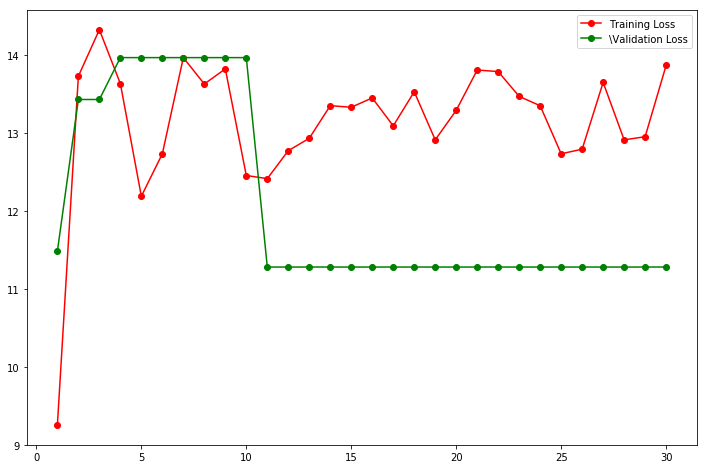

In [ ]:
plt.figure(figsize=(12, 8))

loss = history.history['loss']                          # Loss on the training data
val_loss = history.history['val_loss']                  # Loss on the validation data
epochs = range(1, 31)

plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = '\Validation Loss')
plt.legend()

In [ ]:
#Benchmark Model:

In [ ]:
import numpy as np
np.random.seed(141)

people = np.arange(1, 26)
chosen = np.random.choice(people, 9, replace=False)

print('The following people are chosen:', chosen)

bench_files = []
indexes = []
for index in chosen:
    for i, path in enumerate(raw_data['filenames']):
        if (('person' + str(index)) in path) or (('person0' + str(index)) in path):
            bench_files.append(path)
            indexes.append(i)
            
bench_files = np.array(bench_files)
bench_targets = raw_data['target'][indexes]

The following people are chosen: [11 21 19 14 25 10 15  6  5]


In [ ]:
import numpy as np
from keras.utils import to_categorical
from utils import Videos

reader = Videos(target_size=(128, 128), 
                to_gray=True, 
                max_frames=200, 
                extract_frames='first',  
                normalize_pixels=(-1, 1))

In [ ]:
bench_video = reader.read_videos(bench_files)
bench_target = to_categorical(bench_targets, num_classes=6)
print('Shape of training data:', bench_video.shape)
print('Shape of training labels:', bench_target.shape)


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:39<00:00,  1.05it/s]

Shape of training data: (48, 200, 128, 128, 1)
Shape of training labels: (48, 6)


In [ ]:
model.load_weights('Model_1.weights.best.hdf5')

(loss, accuracy) = model.evaluate(bench_video, bench_target, batch_size=16, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

Accuracy on test data: 45.83%


In [ ]:
benchmark_cnf_matrix = [
    [0.979, 0.07, 0.07, 0.0, 0.0, 0.07], 
    [0.354, 0.597, 0.035, 0.0, 0.0, 0.014], 
    [0.208, 0.049, 0.736, 0.0, 0.0, 0.07], 
    [0.0, 0.0, 0.0, 0.604, 0.167, 0.229], 
    [0.0, 0.0, 0.0, 0.389, 0.549, 0.063], 
    [0.0, 0.0, 0.0, 0.162, 0.0, 0.838]
]

benchmark_cnf_matrix = np.array(benchmark_cnf_matrix)

In [ ]:
import itertools
def confusion_matrix_plot(cm, classes, 
                          title='Normalized Confusion Matrix', 
                          normalize=False, 
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

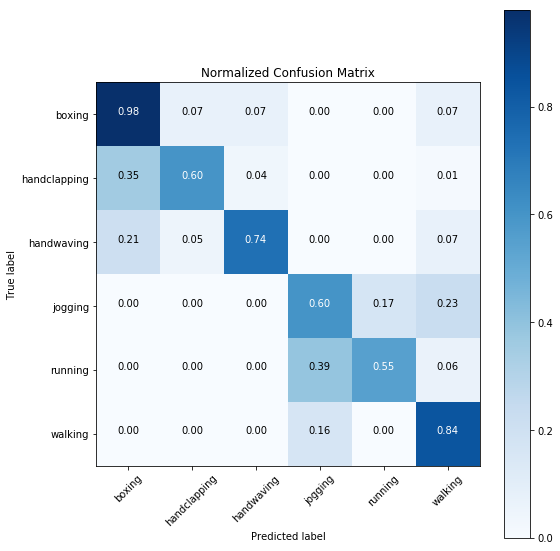

In [ ]:
#Confusion matrix of the Benchmark Model
confusion_matrix_plot(benchmark_cnf_matrix, 
                      classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'])

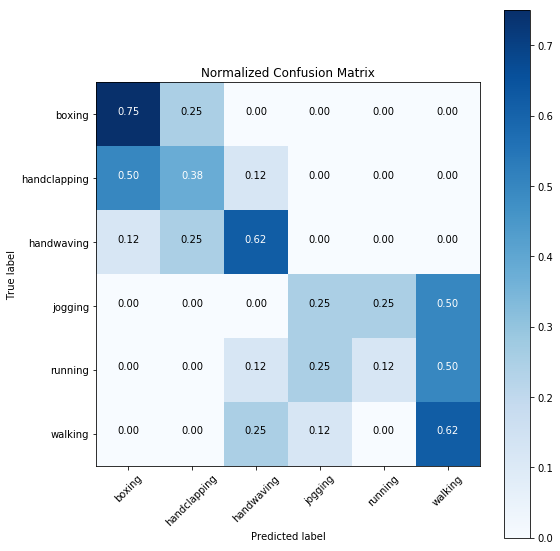

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = model.predict_classes(bench_video)

model_cnf_matrix = confusion_matrix(bench_targets, predictions)

confusion_matrix_plot = confusion_matrix_plot(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)

In [ ]:
               6